In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
# This file contains all the main external libs we'll use
from fastai.imports import *
#from fastai.transforms import *
from fastai.conv_learner import *
#from fastai.model import *
#from fastai.dataset import *
#from fastai.sgdr import *
#from fastai.plots import *

In [ ]:
print(torch.__version__)

In [4]:
import pydicom
import glob
import os
import numpy
import seaborn as sns
from itertools import chain
from pathlib import Path

In [5]:
PATH = "./"
SPECTPATH = Path("../data/PPMISPECT/")

In [6]:
lstFilesDCM = []  # create an empty list
'''for dirName, subdirList, fileList in os.walk(PathDicom):
    for filename in fileList:
        if ".dcm" in filename.lower():  # check whether the file's DICOM
            lstFilesDCM.append(os.path.join(dirName,filename))'''

'for dirName, subdirList, fileList in os.walk(PathDicom):\n    for filename in fileList:\n        if ".dcm" in filename.lower():  # check whether the file\'s DICOM\n            lstFilesDCM.append(os.path.join(dirName,filename))'

In [7]:
metadata = pd.read_csv(f'{PATH}PPMI.csv')

In [8]:
metadata[0:5]

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
0,388628,4140,Control,M,76,0,SPECT,Reconstructed DaTSCAN,Processed,4/09/2013,DCM,5/27/2018
1,388627,4139,Control,M,81,0,SPECT,Reconstructed DaTSCAN,Processed,3/19/2013,DCM,5/27/2018
2,388626,4137,PD,M,70,0,SPECT,Reconstructed DaTSCAN,Processed,4/02/2013,DCM,5/27/2018
3,388625,4136,PD,M,56,0,SPECT,Reconstructed DaTSCAN,Processed,2/13/2013,DCM,5/27/2018
4,451290,4135,PD,M,68,5,SPECT,Reconstructed DaTSCAN,Processed,2/18/2014,DCM,5/27/2018


In [9]:
#Shuffle data
metadata = metadata.sample(frac=1).reset_index(drop=True)

In [10]:
metadata[0:5]

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
0,360618,3769,Control,M,71,0,SPECT,Reconstructed DaTSCAN,Processed,10/25/2012,DCM,5/27/2018
1,388617,4122,PD,M,64,0,SPECT,Reconstructed DaTSCAN,Processed,2/06/2013,DCM,5/27/2018
2,363956,3870,PD,F,41,0,SPECT,Reconstructed DaTSCAN,Processed,11/29/2012,DCM,5/27/2018
3,388601,4107,PD,M,71,0,SPECT,Reconstructed DaTSCAN,Processed,12/21/2012,DCM,5/27/2018
4,419581,3829,PD,F,68,5,SPECT,Reconstructed DaTSCAN,Processed,10/01/2013,DCM,5/27/2018


In [11]:
for file in glob.glob(f'{PATH}PPMI*/**/Reconstructed_DaTSCAN/**/**/*.dcm'):
    lstFilesDCM.append(file)

In [12]:
len(lstFilesDCM)

1569

In [13]:
ptID = []
for i in lstFilesDCM:
    j = i.split("_")[13].strip()
    j = int(j[1:7])
    ptID.append(j)
len(ptID)

1569

In [14]:
p ={}
for o in ptID:
    for k in metadata.iloc[:,0]:
        if o == k:
            p[o] = metadata.loc[metadata['Image Data ID'] == k, 'Group'].tolist()[0]
len(p)

1569

In [15]:
df = metadata[['Image Data ID','Group','Subject','Age','Sex']].set_index('Image Data ID')
for index, rows in df.iterrows():
    for i in lstFilesDCM:
        j = i.split("_")[13].strip()
        j = int(j[1:7])
        if index == j:
            df.loc[df.index == j, "Filenames"] = i


In [163]:
#Check duplicate item
bg = []
for i in lstFilesDCM:
    for index, rows in df.iterrows():
        j = i.split("_")[13].strip()
        j = int(j[1:7])
        if j == index:
            bg.append(index)
print( [item for item, count in collections.Counter(bg).items() if count > 1] )
            

In [16]:
lstFilesDCM = df['Filenames'].values

In [17]:
lstFilesDCM = lstFilesDCM.tolist()

In [18]:
df.sample(frac=0.2, axis=0)

,Group,Subject,Age,Sex,Filenames
Image Data ID,,,,,
388578,Control,3969,80,F,./PPMI 9/3969/Reconstructed_DaTSCAN/2013-02-20...
767696,PD,3307,70,M,./PPMI 4/3307/Reconstructed_DaTSCAN/2015-11-05...
913228,PD,4109,71,M,./PPMI 4/4109/Reconstructed_DaTSCAN/2017-02-24...
418920,PD,3504,63,M,./PPMI 9/3504/Reconstructed_DaTSCAN/2013-01-23...
418669,PD,3307,67,M,./PPMI 2/3307/Reconstructed_DaTSCAN/2012-11-07...
360624,PD,4101,67,F,./PPMI 2/4101/Reconstructed_DaTSCAN/2012-11-14...
360615,PD,3633,69,F,./PPMI 3/3633/Reconstructed_DaTSCAN/2012-11-01...
342171,PD,3020,74,F,./PPMI 5/3020/Reconstructed_DaTSCAN/2012-03-27...
355210,PD,3473,55,F,./PPMI 3/3473/Reconstructed_DaTSCAN/2012-08-15...


In [19]:
up = pd.read_csv('comandfile.csv')

In [20]:
up.head()

,Image Data ID,Group,Filenames,TOTAL3,1YR,2YR,3YR,TOTAL3.1
0,688484,PD,./PPMI 5/3108/Reconstructed_DaTSCAN/2015-05-07...,10.500000,18.00,25.0,NaN,10.500000
1,446117,PD,./PPMI/3308/Reconstructed_DaTSCAN/2014-02-12_1...,19.666667,25.00,20.5,27.0,19.666667
2,446109,PD,./PPMI 9/3173/Reconstructed_DaTSCAN/2014-03-19...,24.500000,30.50,38.0,49.0,24.500000
3,341084,PD,./PPMI 8/3951/Reconstructed_DaTSCAN/2011-09-28...,14.000000,17.75,18.0,10.5,14.000000
4,363942,PD,./PPMI/3027/Reconstructed_DaTSCAN/2012-11-28_1...,26.000000,22.25,22.0,17.5,26.000000


In [21]:
up_df = up[['Image Data ID','TOTAL3','1YR','2YR','3YR','TOTAL3']].set_index('Image Data ID')

In [22]:
df1to4 = df.join(up_df)

In [23]:
df1to4 = df1to4.dropna(axis=0,subset=(['1YR']))

In [222]:
df1to4.to_csv('comandfile.csv')

In [7]:
df1to4 = pd.read_csv('comandfile.csv')

In [8]:
df1to4 = df1to4[~df1to4.Group.str.contains('Control')]

In [9]:
df1to4 = df1to4[~df1to4.TOTAL3.isnull()]

In [10]:
df1to4.any().isnull()

Unnamed: 0       False
Image Data ID    False
Group            False
Subject          False
Age              False
Sex              False
Filenames        False
TOTAL3           False
1YR              False
2YR              False
3YR              False
TOTAL3.1         False
dtype: bool

In [11]:
df1to4.loc[df1to4['Sex']=='F', 'Sex']=0
df1to4.loc[df1to4['Sex']=='M', 'Sex']=1

In [12]:
pro = (df1to4['1YR'].values - df1to4['TOTAL3'].values)
progress = []

for i in pro:
    if i > 2 : progress.append('2')
    elif i < (-2) : progress.append('1')
    else : progress.append('0')
df1to4['Progress'] = progress
df1to4['pro'] = pro
del(pro,progress)

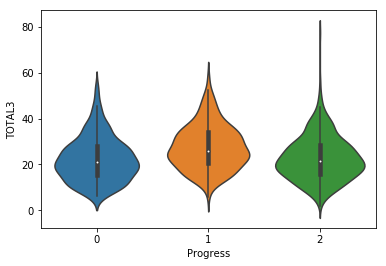

In [13]:
sns.violinplot(df1to4['Progress'], df1to4['TOTAL3'])

In [15]:
X0 = df1to4['pro'].values
X1 = df1to4['1YR'].values

In [170]:
from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters=5, max_iter=1000)
# Fitting the input data
kmeans = kmeans.fit(X0.reshape(-1,1))
# Getting the cluster labels
labels = kmeans.predict(X0.reshape(-1,1))
# Centroid values
centroids = kmeans.cluster_centers_

In [171]:
centroids # From sci-kit learn

array([[-9.49912],
       [ 4.79618],
       [11.94695],
       [27.47917],
       [-1.18436]])

TypeError: scatter() missing 1 required positional argument: 'y'

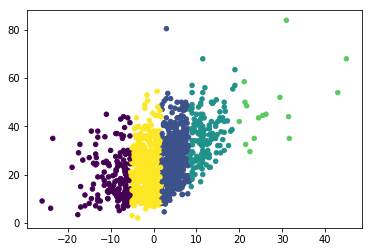

In [172]:
plt.scatter(X0,X1, c=labels, s=20, cmap='viridis')

centers = kmeans.cluster_centers_
colmap = {1: 'r', 2: 'g', 3: 'b'}
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid,color=colmap[idx+1])

In [176]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [186]:
# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(X0.reshape(-1,1), labels)
print("For n_clusters =", 3,
      "The average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X1.reshape(-1,1), labels)

For n_clusters = 3 The average silhouette_score is : 0.5415063142855803


In [198]:
X = X0.reshape(-1,1)


Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.5248740067247121


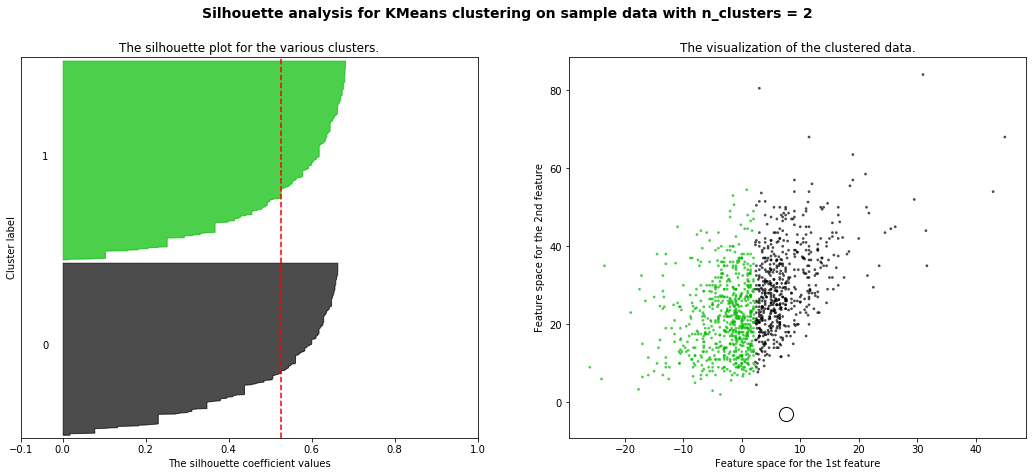

For n_clusters = 3 The average silhouette_score is : 0.5107293466262729


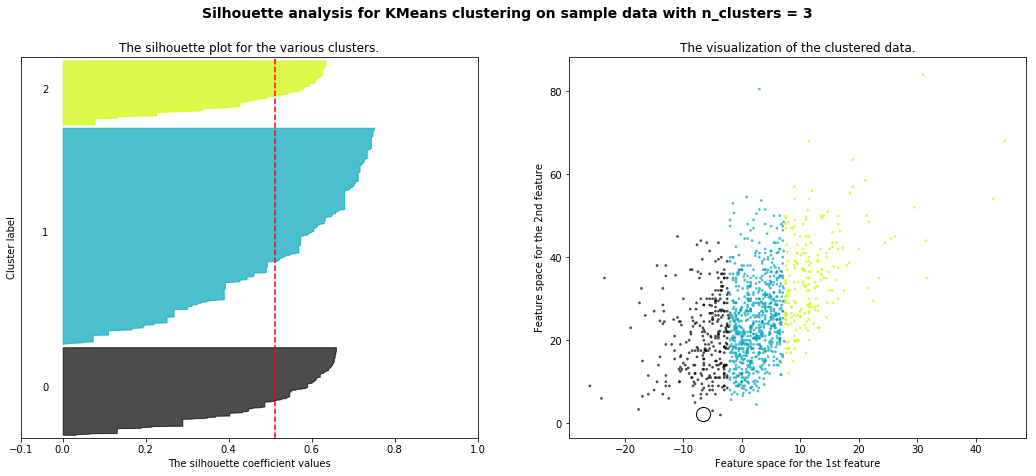

For n_clusters = 4 The average silhouette_score is : 0.5393508313644698


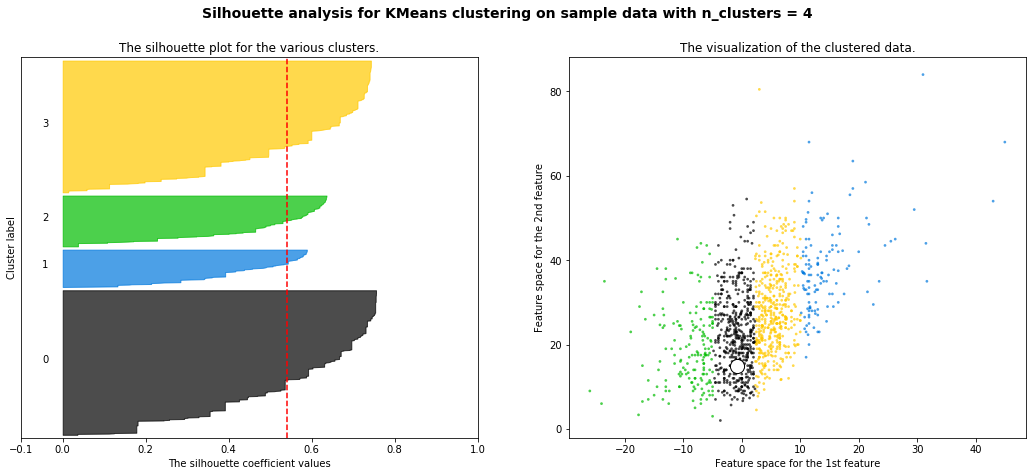

For n_clusters = 5 The average silhouette_score is : 0.5458060978250263


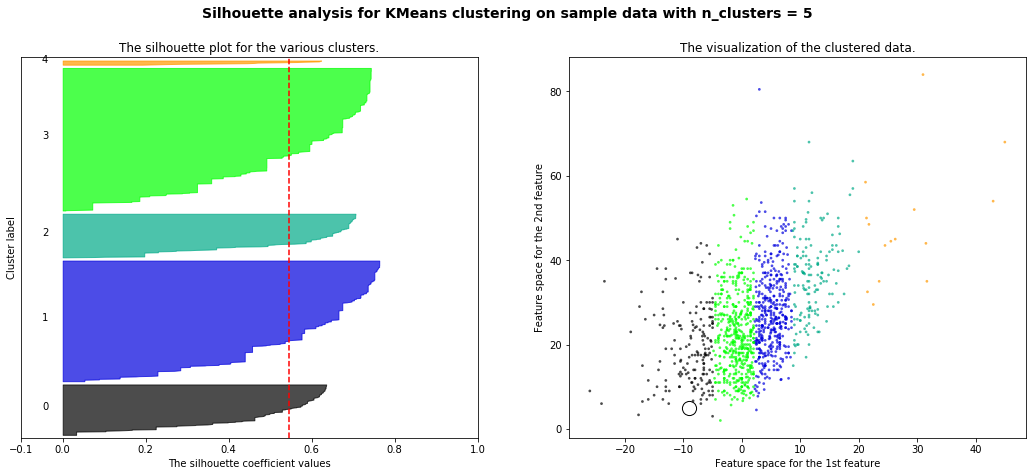

For n_clusters = 6 The average silhouette_score is : 0.5440273714295698


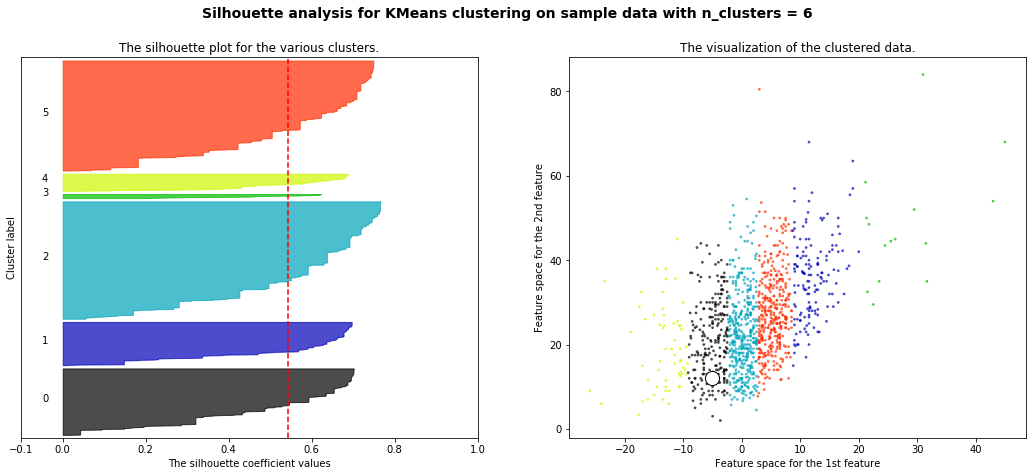

For n_clusters = 7 The average silhouette_score is : 0.5318469441858701


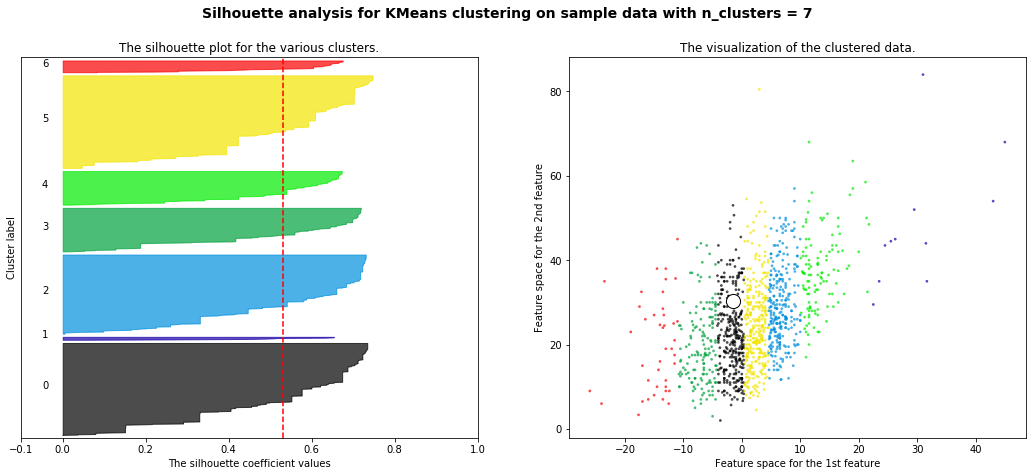

For n_clusters = 8 The average silhouette_score is : 0.5407193811195385


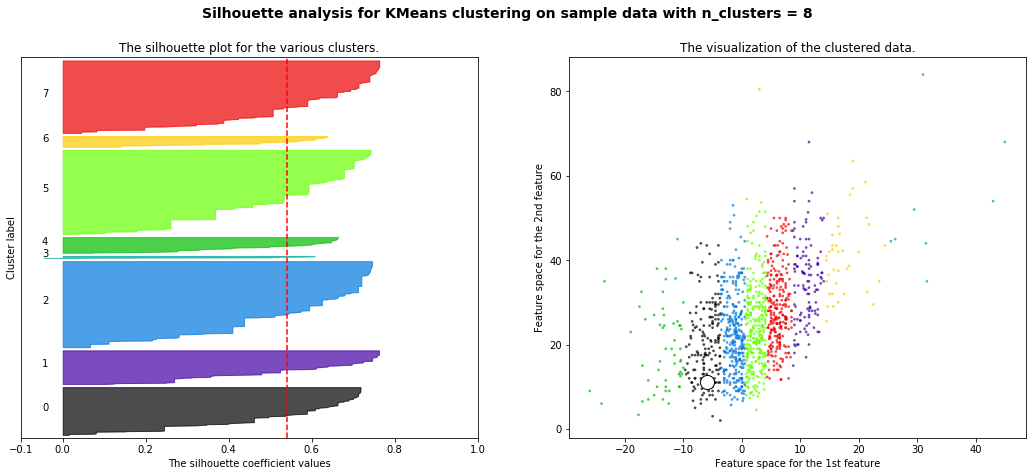

In [200]:
from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.

range_n_clusters = [2, 3, 4, 5, 6,7,8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X0, X1, marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[0], centers[1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    #for i, c in enumerate(centers):
    #    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
    #                s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scale3 = MinMaxScaler()

In [16]:
print(scale3.fit(df1to4['TOTAL3'].values.reshape(-1,1)))

MinMaxScaler(copy=True, feature_range=(0, 1))


In [17]:
df1to4['3scale'] = scale3.transform(df1to4['TOTAL3'].values.reshape(-1,1))

In [18]:
del(scale3)

In [14]:
from sklearn.model_selection import train_test_split
X_train_tmp, X_test_tmp, param_train_tmp, param_test_tmp, y_train_tmp, y_test_tmp = train_test_split(df1to4, df1to4[['Sex','Age','TOTAL3']], df1to4['Progress'], test_size=0.2)

from sklearn.model_selection import train_test_split
X_train_tmp, X_val_tmp, param_train_tmp, param_val_tmp, y_train_tmp, y_val_tmp = train_test_split(X_train_tmp, param_train_tmp, y_train_tmp, test_size=0.3)

In [15]:
lstFilesDCM_train = []  # create an empty list
lstFilesDCM_test = []
lstFilesDCM_val = []
lstFilesDCM_train = X_train_tmp['Filenames'].values
lstFilesDCM_train = lstFilesDCM_train.tolist()
lstFilesDCM_test = X_test_tmp['Filenames'].values
lstFilesDCM_test = lstFilesDCM_test.tolist()
lstFilesDCM_val = X_val_tmp['Filenames'].values
lstFilesDCM_val = lstFilesDCM_val.tolist()

For NORMAL Image

In [16]:
#Training Set

In [17]:
# loop through all the DICOM files
image_array_39_train =[]
#for i in [38,39,40,41,42,43]:
for filenameDCM in lstFilesDCM_train:
    #print(lstFilesDCM_train.index(filenameDCM))
    # read the file
    ds = pydicom.read_file(str(SPECTPATH / filenameDCM))
    # store the raw image data
    image_array_39_train.append(ds.pixel_array[39])
    image_array_39_train.append(ds.pixel_array[39][:,::-1])
    #For debug corrupted image
    #print(np.asarray(image_array_39_train).shape)

In [18]:
# loop through all the DICOM files
image_array_40_train =[]

#for i in [38,39,40,41,42,43]:
for filenameDCM in lstFilesDCM_train:
    #print(lstFilesDCM_train.index(filenameDCM))
    # read the file
    ds = pydicom.read_file(str(SPECTPATH / filenameDCM))
    # store the raw image data
    image_array_40_train.append(ds.pixel_array[40])
    image_array_40_train.append(ds.pixel_array[40][:,::-1])
    #For debug corrupted image
    #print(np.asarray(image_array_40_train).shape)

In [19]:
# loop through all the DICOM files
image_array_41_train =[]
#for i in [38,39,40,41,42,43]:
for filenameDCM in lstFilesDCM_train:
    #print(lstFilesDCM_train.index(filenameDCM))
    # read the file
    ds = pydicom.read_file(str(SPECTPATH / filenameDCM))
    # store the raw image data
    image_array_41_train.append(ds.pixel_array[41])
    image_array_41_train.append(ds.pixel_array[41][:,::-1])
    #For debug corrupted image
    #print(np.asarray(image_array_41_train).shape)

In [20]:
#Stack up to made RGB, so we can use pretrain model
image_array_train = []
image_array_train = np.vstack((image_array_39_train, image_array_40_train, image_array_41_train))

In [21]:
del(image_array_39_train, image_array_40_train, image_array_41_train)

In [22]:
image_array_train.shape

(4110, 109, 91)

In [23]:
image_array_train= image_array_train.astype('float64')

In [24]:
image_array_train -= image_array_train.min()
image_array_train /= (image_array_train.max()-image_array_train.min())

In [25]:
#Validation set

In [26]:
'''# loop through all the DICOM files
image_array_39_val =[]
#for i in [38,39,40,41,42,43]:
for filenameDCM in lstFilesDCM_val:
    #print(lstFilesDCM_train.index(filenameDCM))
    # read the file
    ds = pydicom.read_file(filenameDCM)
    # store the raw image data
    image_array_39_val.append(ds.pixel_array[39])
    #For debug corrupted image
    #print(np.asarray(image_array_39_train).shape)'''

# loop through all the DICOM files
image_array_40_val =[]
#for i in [38,39,40,41,42,43]:
for filenameDCM in lstFilesDCM_val:
    #print(lstFilesDCM_train.index(filenameDCM))
    # read the file
    ds = pydicom.read_file(str(SPECTPATH / filenameDCM))
    # store the raw image data
    image_array_40_val.append(ds.pixel_array[40])
    #For debug corrupted image
    #print(np.asarray(image_array_40_train).shape)

'''# loop through all the DICOM files
image_array_41_val =[]
#for i in [38,39,40,41,42,43]:
for filenameDCM in lstFilesDCM_val:
    #print(lstFilesDCM_train.index(filenameDCM))
    # read the file
    ds = pydicom.read_file(filenameDCM)
    # store the raw image data
    image_array_41_val.append(ds.pixel_array[41])
    #For debug corrupted image
    #print(np.asarray(image_array_41_train).shape)'''

#Stack up to made RGB, so we can use pretrain model
'''image_array_val = np.vstack((
    np.stack([image_array_39_val, image_array_39_val, image_array_39_val], axis=3),
    np.stack([image_array_40_val, image_array_40_val, image_array_40_val], axis=3),
    np.stack([image_array_41_val, image_array_41_val, image_array_41_val], axis=3)))'''

image_array_val = np.asarray(image_array_40_val, dtype='float64')
image_array_val -= image_array_val.min()
image_array_val /= (image_array_val.max()-image_array_val.min())
del(image_array_40_val)
image_array_val.shape

(294, 109, 91)

In [27]:
#Test set

In [28]:
'''# loop through all the DICOM files
image_array_39_test =[]
#for i in [38,39,40,41,42,43]:
for filenameDCM in lstFilesDCM_test:
    #print(lstFilesDCM_train.index(filenameDCM))
    # read the file
    ds = pydicom.read_file(filenameDCM)
    # store the raw image data
    image_array_39_test.append(ds.pixel_array[39])
    #For debug corrupted image
    #print(np.asarray(image_array_39_train).shape)'''

# loop through all the DICOM files
image_array_40_test =[]
#for i in [38,39,40,41,42,43]:
for filenameDCM in lstFilesDCM_test:
    #print(lstFilesDCM_train.index(filenameDCM))
    # read the file
    ds = pydicom.read_file(str(SPECTPATH / filenameDCM))
    # store the raw image data
    image_array_40_test.append(ds.pixel_array[40])
    #For debug corrupted image
    #print(np.asarray(image_array_40_train).shape)

'''# loop through all the DICOM files
image_array_41_test =[]
#for i in [38,39,40,41,42,43]:
for filenameDCM in lstFilesDCM_test:
    #print(lstFilesDCM_train.index(filenameDCM))
    # read the file
    ds = pydicom.read_file(filenameDCM)
    # store the raw image data
    image_array_41_test.append(ds.pixel_array[41])
    #For debug corrupted image
    #print(np.asarray(image_array_41_train).shape)'''

'''#Stack up to made RGB, so we can use pretrain model
image_array_test = np.vstack((
    np.stack([image_array_39_test, image_array_39_test, image_array_39_test], axis=3),
    np.stack([image_array_40_test, image_array_40_test, image_array_40_test], axis=3),
    np.stack([image_array_41_test, image_array_41_test, image_array_41_test], axis=3)))'''

image_array_test = np.asarray(image_array_40_test, dtype='float64')
image_array_test -= image_array_test.min()
image_array_test /= (image_array_test.max()-image_array_test.min())
del(image_array_40_test)
image_array_test.shape

(245, 109, 91)

In [29]:
#Check matched data-result by Image ID number
lstFilesDCM_test[0:5]

['./PPMI8/4033/Reconstructed_DaTSCAN/2015-03-31_13_31_36.0/S268036/PPMI_4033_NM_Reconstructed_DaTSCAN_Br_20150807125126270_1_S268036_I504464.dcm',
 './PPMI3/3709/Reconstructed_DaTSCAN/2017-02-22_15_18_03.0/S614355/PPMI_3709_NM_Reconstructed_DaTSCAN_Br_20171002102957386_1_S614355_I913225.dcm',
 './PPMI9/3123/Reconstructed_DaTSCAN/2014-05-22_12_08_10.0/S234154/PPMI_3123_NM_Reconstructed_DaTSCAN_Br_20141021160254326_1_S234154_I449008.dcm',
 './PPMI9/4001/Reconstructed_DaTSCAN/2011-06-23_14_52_49.0/S117666/PPMI_4001_NM_Reconstructed_DaTSCAN_Br_20121009132335038_1_S117666_I339030.dcm',
 './PPMI7/3116/Reconstructed_DaTSCAN/2011-10-12_12_38_49.0/S131272/PPMI_3116_NM_Reconstructed_DaTSCAN_Br_20130910160338220_1_S131272_I389190.dcm']

In [30]:
X_test_tmp[0:5]

,Unnamed: 0,Image Data ID,Group,Subject,Age,Sex,Filenames,TOTAL3,1YR,2YR,3YR,TOTAL3.1,Progress,pro
120,120,504464,PD,4033,52,0,./PPMI8/4033/Reconstructed_DaTSCAN/2015-03-31_...,6.0,17.0,13.0,NaN,6.0,2,11.0
996,996,913225,PD,3709,73,1,./PPMI3/3709/Reconstructed_DaTSCAN/2017-02-22_...,31.0,19.0,NaN,NaN,31.0,1,-12.0
604,604,449008,PD,3123,71,1,./PPMI9/3123/Reconstructed_DaTSCAN/2014-05-22_...,23.0,8.0,13.0,17.0,23.0,1,-15.0
952,952,339030,PD,4001,50,1,./PPMI9/4001/Reconstructed_DaTSCAN/2011-06-23_...,32.0,26.5,34.0,28.5,32.0,1,-5.5
1122,1122,389190,PD,3116,65,1,./PPMI7/3116/Reconstructed_DaTSCAN/2011-10-12_...,38.0,42.0,40.0,49.0,38.0,2,4.0


In [31]:
y_train = np.asarray(y_train_tmp.values)
y_train = np.hstack((y_train,y_train,y_train))
y_train = np.hstack((y_train,y_train))
y_train = y_train.astype('int64')
y_val = np.asarray(y_val_tmp.values)
y_val = y_val.astype('int64')
#y_val= np.hstack((y_val,y_val,y_val))
y_test = np.asarray(y_test_tmp.values)
y_test = y_test.astype('int64')
#y_val= np.hstack((y_val,y_val,y_val))

In [32]:
y_train.shape,y_val.shape,y_test.shape

((4110,), (294,), (245,))

In [33]:
param_train = param_train_tmp.values
params = []
for i in param_train:
    stack = []
    stack.append(i)
    stack = stack*10
    params.append(stack)
param_train = np.asarray(params)
del(params)

In [34]:
param_val = param_val_tmp.values
params = []
for i in param_val:
    stack = []
    stack.append(i)
    stack = stack*10
    params.append(stack)
param_val = np.asarray(params)
del(params)

param_test = param_test_tmp.values
params = []
for i in param_test:
    stack = []
    stack.append(i)
    stack = stack*10
    params.append(stack)
param_test = np.asarray(params)
del(params)

In [35]:
#x6 Param match training Image
param_train = np.vstack((param_train,param_train,param_train))
param_train = np.vstack((param_train,param_train))

In [36]:
param_train.shape

(4110, 10, 3)

### Load dataset

In [37]:
param_train = torch.from_numpy(param_train)
param_test = torch.from_numpy(param_test)
param_val = torch.from_numpy(param_val)
image_array_train = torch.from_numpy(image_array_train)
image_array_test = torch.from_numpy(image_array_test)
image_array_val = torch.from_numpy(image_array_val)
y_train = torch.from_numpy(y_train)
y_val = torch.from_numpy(y_val)
y_test = torch.from_numpy(y_test)

In [38]:
X_train = torch.utils.data.DataLoader(image_array_train, batch_size=32)
param_train = torch.utils.data.DataLoader(param_train, batch_size=32)
y_train = torch.utils.data.DataLoader(y_train, batch_size=32)
X_val = torch.utils.data.DataLoader(image_array_val, batch_size=32)
param_val = torch.utils.data.DataLoader(param_val, batch_size=32)
y_val = torch.utils.data.DataLoader(y_val, batch_size=32)
X_test = torch.utils.data.DataLoader(image_array_test, batch_size=32)
param_test = torch.utils.data.DataLoader(param_test, batch_size=32)
y_test = torch.utils.data.DataLoader(y_test, batch_size=32)

del(image_array_train,image_array_val,image_array_test)
del(X_train_tmp,X_val_tmp,X_test_tmp,y_train_tmp,y_val_tmp,y_test_tmp,param_train_tmp,param_val_tmp,param_test_tmp)

### Darknet

In [39]:
def conv_layer(ni, nf, ks=3, stride=1):
    return nn.Sequential(
        nn.Conv2d(ni, nf, kernel_size=ks, bias=False, stride=stride, padding=ks//2),
        nn.BatchNorm2d(nf, momentum=0.01),
        nn.LeakyReLU(negative_slope=0.1, inplace=False))

class ResLayer(nn.Module):
    def __init__(self, ni):
        super().__init__()
        self.conv1=conv_layer(ni, ni//2, ks=1)
        self.conv2=conv_layer(ni//2, ni, ks=3)
        
    def forward(self, x): return x.add_(self.conv2(self.conv1(x.clone())))

class Darknet(nn.Module):
    def make_group_layer(self, ch_in, num_blocks, stride=1):
        return [conv_layer(ch_in, ch_in*2,stride=stride)
               ] + [(ResLayer(ch_in*2)) for i in range(num_blocks)]

    def __init__(self, num_blocks, num_classes, nf=32):
        super().__init__()
        features = [conv_layer(1, nf, ks=3, stride=1)]
        for i,nb in enumerate(num_blocks):
            features += self.make_group_layer(nf, nb, stride=2-(i==1))
            nf *= 2                        
        features += [nn.AdaptiveAvgPool2d(1), Flatten()]        
        self.features = nn.Sequential(*features)
        fc1 = [nn.Linear(1054, 120), nn.BatchNorm1d(120, momentum=0.01), nn.LeakyReLU(negative_slope=0.1, inplace=False)]
        self.fc1 = nn.Sequential(*fc1)
        self.layers = nn.Sequential(nn.Linear(120,3))
        
    def forward(self, x, y):
        x = x.unsqueeze(1)
        x = self.features(x)
        x = torch.cat((x,y[:,:,0],y[:,:,1],y[:,:,2]),1)
        x = self.fc1(x)
        x = F.relu(x)
        #x = F.dropout(x, p=0.2, training=self.training)
        #return F.log_softmax(self.layers(x), dim=-1)
        return self.layers(x)


In [40]:
ml = Darknet([1,2,4,6,3], num_classes=3, nf=32)
ml.double()
#m = nn.DataParallel(m, [1,2,3])

Darknet(
  (features): Sequential(
    (0): Sequential(
      (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.01, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.1)
    )
    (1): Sequential(
      (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.01, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.1)
    )
    (2): ResLayer(
      (conv1): Sequential(
        (0): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.01, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.1)
      )
      (conv2): Sequential(
        (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.01, affine=True, track_running_st

In [41]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#device = "cpu"
ml.to(device)
print(device)

cuda:0


In [42]:
optimizer = optim.Adam(ml.parameters(), lr = 1e-3)
criterion = nn.CrossEntropyLoss().cuda()
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma = 0.5)

In [43]:
losslog=[]
vallog=[]

In [44]:


### Train

def train(niter):
    for epoch in trange(niter):  # loop over the dataset multiple times
        running_loss = 0.0        

        ml.train(True)
        scheduler.step()
        with tqdm(total=len(X_train)) as pbar:
            for i, (x, p, y) in enumerate(zip(X_train,param_train,y_train)):
                x,p,y = x.to(device), p.to(device),y.to(device)
                #i += 1
                # zero the parameter gradients
                optimizer.zero_grad()

                # forward + backward + optimize
                outputs = ml(x,p)
                loss = criterion(outputs,y)
                loss.backward()
                for param in optimizer.param_groups[0]['params']:
                    param.data = param.data.add(-0.0001 * optimizer.param_groups[0]['lr'], param.data)
                optimizer.step()
                pbar.update()

                # print statistics
                running_loss += loss.item()
                if i % 20 == 19:    # print every 0 mini-batches
                    print('[%d, %5d]  Train CrossEntropyLoss: %.3f' %
                          (epoch + 1, i + 1, running_loss / 20))
                    losslog.append(running_loss/20)
                    running_loss = 0.0
                    
            #Eval
        with tqdm(total=len(X_val)) as pbar:
            with torch.no_grad():
                predicted =[]
                for i, ( x, p, y) in enumerate(zip(X_val,param_val,y_val)):
                    x,p,y = x.to(device), p.to(device),y.to(device)
                    # forward + backward + optimize
                    outputs = ml(x,p)
                    loss = criterion(outputs,y)
                    pred = outputs.squeeze(1).cpu().numpy().tolist()
                    predicted.append(pred)
                    pbar.update()

                predicted = list(chain.from_iterable(predicted))                
                valloss = loss.item()
                vallog.append(valloss)
                print(f'CrossEntropyLoss: {valloss}')
            
    print('Finished Training')
    return losslog,vallog

In [52]:
MUL = train(1)

100%|██████████| 10/10 [00:20<00:00,  1.66s/it]CrossEntropyLoss: 1.0958207086605458

100%|██████████| 1/1 [07:43<00:00, 463.46s/it]Finished Training


In [53]:
vallog

[1.0726102574865022, 1.045095729689864, 1.0705959330138441, 1.0958207086605458]

## Validate

In [54]:
def test():
    with torch.no_grad():
        n = len(X_test)
        ml.eval()
        predicted = []
        correct = 0
        total = 0
        with tqdm(total=n) as pbar:
            for i, ( x, p, y) in enumerate(zip(X_test,param_test,y_test)):
                x,p,y = x.to(device), p.to(device),y.to(device)


                # forward + backward + optimize
                outputs = ml(x,p)
                _, pred = torch.max(outputs.data, 1)
                total += y.size(0)
                correct += (pred == y).sum()

    print('Accuracy of the network on the test images: %d %%' % (
    100 * correct / total))
    return pred

In [55]:
TEST = test()

  0%|          | 0/8 [00:00<?, ?it/s]
Accuracy of the network on the test images: 41 %


In [56]:
TEST

tensor([ 2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  1,  2,
         2,  2,  2,  2,  2,  2,  2], device='cuda:0')

In [50]:
model_save_path = './weights/'

In [51]:
torch.save(ml.state_dict(),f'{model_save_path}Predict_progress_.pth')

In [46]:
ml = Darknet([1,2,4,6,3], num_classes=1, nf=32)
ml.double()
ml.load_state_dict(torch.load('Predict_pregress_.pth'))

In [47]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
ml.to(device)
print(device)

cuda:0
